In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import sklearn

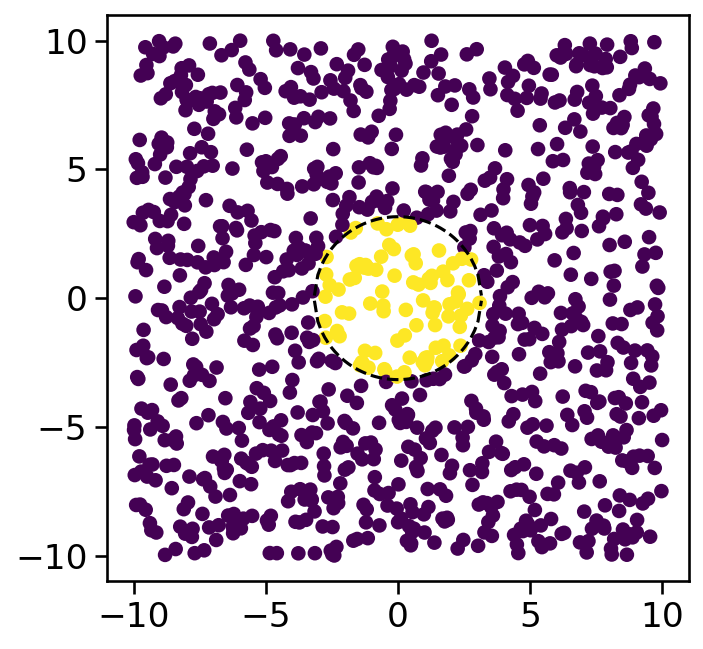

In [13]:
x = np.linspace(-10, 10, 1500)
x = np.vstack((x, -10 + 20 * np.random.random(x.shape[0])))
X = x.T
y = (X[:, 0]**2 + X[:, 1]**2 - 10) < 0
y = y * 1
X = pd.DataFrame(X, columns=['x1', 'x2'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)

xc = np.linspace(-9.99**0.5, 9.99**0.5, 50)
ax.plot(xc, (10 - xc ** 2)**0.5, '--k')
ax.plot(xc, -(10 - xc ** 2)**0.5, '--k')

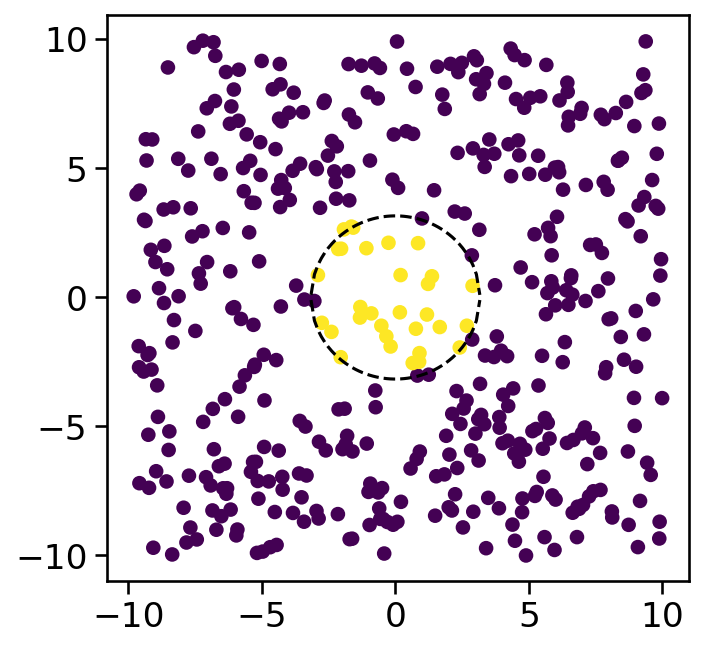

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegressionCV
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('kernel', RBFSampler(gamma=1), ['x1', 'x2'])
])

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regression', LogisticRegressionCV())
])

model = pipeline.fit(X_train, y_train)

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=model.predict(X_test))
ax.plot(xc, (10 - xc ** 2)**0.5, '--k')
ax.plot(xc, -(10 - xc ** 2)**0.5, '--k')